In [1]:
import pandas as pd
import numpy as np

#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r'D:\stock_data\^spx_d.csv',parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1900-05-01,6.51,6.51,6.51,6.51,NaN
1900-05-02,6.47,6.47,6.47,6.47,NaN
1900-05-03,6.49,6.49,6.49,6.49,NaN
1900-05-04,6.50,6.50,6.50,6.50,NaN
1900-05-05,6.51,6.51,6.51,6.51,NaN


In [3]:
df_month = df.loc[df.groupby(df.index.to_period('M')).apply(lambda x: x.index.max())]
df_month['Change'] = df_month['Close'].pct_change()
df_month['Change12'] = df_month['Close'].pct_change(12)
df_month = df_month[df_month.index > '1980-01-01']
df_month

,Open,High,Low,Close,Volume,Change,Change12
Date,,,,,,,
1980-01-31,115.20,117.17,113.78,114.16,7.322222e+07,0.057625,0.142400
1980-02-29,112.35,114.12,111.77,113.66,4.312222e+07,-0.004380,0.180515
1980-03-31,100.68,102.65,100.02,102.09,3.982222e+07,-0.101795,0.004922
1980-04-30,105.86,106.72,104.50,106.29,3.427778e+07,0.041140,0.044517
1980-05-30,110.27,111.55,108.87,111.24,3.868889e+07,0.046571,0.122729
1980-06-30,116.00,116.04,113.55,114.24,3.323333e+07,0.026969,0.110096
1980-07-31,122.23,122.34,119.40,121.67,6.067778e+07,0.065039,0.172045
1980-08-29,122.08,123.01,121.06,122.38,3.723333e+07,0.005835,0.119466
1980-09-30,123.54,126.09,123.54,125.46,4.476667e+07,0.025168,0.147640


In [4]:
init_stock = 100
init_cash = 0
cash_rate = 0.001 # 현금이율을 월 0.1%고정
buy_and_hold = 100

df_month['return_bh'] = 0
df_month['return'] = 0
df_month['stock'] = 0
df_month['cash'] = 0

# 매월 rebalace
for index,row in df_month.iterrows():
    # 이전달 금액에서 수일률 적용
    init_stock = init_stock*(row['Change'] + 1)  
    init_cash = init_cash * (cash_rate + 1)
    buy_and_hold = buy_and_hold*(row['Change'] + 1)
    
    # 데이터프레임에 저장
    df_month.loc[index,'return_bh'] = buy_and_hold
    df_month.loc[index,'return'] = init_stock + init_cash
    df_month.loc[index,'stock'] = (init_stock + init_cash)/2
    df_month.loc[index,'cash'] = (init_stock + init_cash)/2
    
    # 다음 step으로 값전달    
    init_stock = df_month.loc[index,'stock']
    init_cash = df_month.loc[index,'cash']    
    buy_and_hold = df_month.loc[index,'return_bh']

In [5]:
df_month

,Open,High,Low,Close,Volume,Change,Change12,return_bh,return,stock,cash
Date,,,,,,,,,,,
1980-01-31,115.20,117.17,113.78,114.16,7.322222e+07,0.057625,0.142400,105.762461,105.762461,52.881230,52.881230
1980-02-29,112.35,114.12,111.77,113.66,4.312222e+07,-0.004380,0.180515,105.299240,105.583732,52.791866,52.791866
1980-03-31,100.68,102.65,100.02,102.09,3.982222e+07,-0.101795,0.004922,94.580322,100.262585,50.131292,50.131292
1980-04-30,105.86,106.72,104.50,106.29,3.427778e+07,0.041140,0.044517,98.471373,102.375126,51.187563,51.187563
1980-05-30,110.27,111.55,108.87,111.24,3.868889e+07,0.046571,0.122729,103.057254,104.810154,52.405077,52.405077
1980-06-30,116.00,116.04,113.55,114.24,3.323333e+07,0.026969,0.110096,105.836576,106.275857,53.137929,53.137929
1980-07-31,122.23,122.34,119.40,121.67,6.067778e+07,0.065039,0.172045,112.720030,109.785007,54.892503,54.892503
1980-08-29,122.08,123.01,121.06,122.38,3.723333e+07,0.005835,0.119466,113.377802,110.160222,55.080111,55.080111
1980-09-30,123.54,126.09,123.54,125.46,4.476667e+07,0.025168,0.147640,116.231240,111.601532,55.800766,55.800766


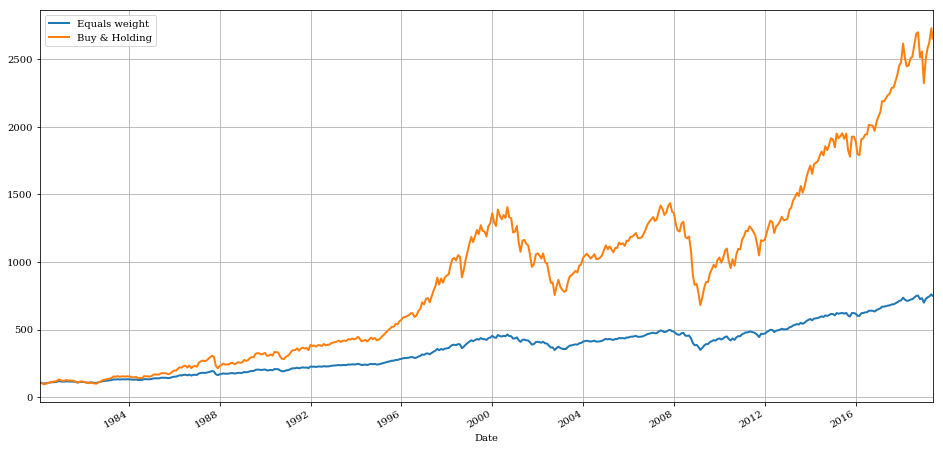

In [7]:
ax = df_month[['return','return_bh']].plot(figsize=(16,8))
ax.legend(["Equals weight", "Buy & Holding"])